# Estudo de Caso 03 - Regressão Linear para Preços de Aluguel

##Aluno:
  - Jonas Honorato Lima de Melo
  - 22251863

## Objetivos e Workflow:
**1) Análise Exploratória de Dados(EDA)**
  - Relações entre as variáveis
  - Limpeza dos dados(nulos, duplicados, outliers,etc)


**2) Regressão Linear**
  - Prever o preço do aluguel com modelo de regressão linear
  - Analisar Performance


**3) Classificação**
  - Classificar se um determinado apartamento está caro ou barato com base na média dos valores utilizando Regressão Logística
  - Analisar Performance do Modelo

**4) Discussões**
  - O modelo previu os preços de aluguel eficientemente ?
  - O modelo classificou os apartamentos em caro ou barato de forma coerente ?
  - Que ajustes poderiam ser realizados para melhorar a performance do modelo ?

## Carregamento do Dataset e EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [ ]:
df = pd.read_csv("/content/sample_data/dados_apartamentos.csv")
df.head()

,area_m2,quartos,banheiros,garagem,distancia_centro_km,andar,preco_aluguel
0,67,1,1,1,4.85,3,2689
1,57,1,1,0,4.85,9,2137
2,69,2,1,0,8.95,13,2306
3,82,2,1,1,2.23,6,3090
4,56,1,2,1,6.01,13,2701


Aqui já podemos perceber que, apesar de conterem valores numéricos, as colunas garagem e andar são variáveis categóricas

**Quantas linhas e quantas colunas ?**

In [ ]:
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas")

O dataset possui 1000 linhas e 7 colunas


**Informações sobre as colunas**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_m2              1000 non-null   int64  
 1   quartos              1000 non-null   int64  
 2   banheiros            1000 non-null   int64  
 3   garagem              1000 non-null   int64  
 4   distancia_centro_km  1000 non-null   float64
 5   andar                1000 non-null   int64  
 6   preco_aluguel        1000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


**Há valores ausentes ?**

In [ ]:
# valores ausente ?
print(df.isnull().sum())

area_m2                0
quartos                0
banheiros              0
garagem                0
distancia_centro_km    0
andar                  0
preco_aluguel          0
dtype: int64


In [ ]:
#Valores duplicados ?
print(f"Valores duplicados:{df.duplicated().sum()}")

Valores duplicados:0


**Estatísticas básicas**

In [ ]:
df.describe()

,area_m2,quartos,banheiros,garagem,distancia_centro_km,andar,preco_aluguel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,59.806000,1.904000,1.457000,0.588000,4.918480,7.337000,2557.083000
std,14.656506,0.698048,0.602091,0.492441,1.998961,4.012921,452.915565
min,20.000000,1.000000,1.000000,0.000000,0.500000,1.000000,1256.000000
25%,50.000000,1.000000,1.000000,0.000000,3.570000,4.000000,2240.000000
50%,60.000000,2.000000,1.000000,1.000000,4.910000,7.000000,2566.000000
75%,69.000000,2.000000,2.000000,1.000000,6.170000,11.000000,2864.000000
max,117.000000,3.000000,3.000000,1.000000,11.490000,14.000000,4143.000000


##Relações entre as variáveis

In [ ]:
# Valor minimo, maximo e medio do aluguel por andar

df.groupby("andar").agg(
    menor_preco=("preco_aluguel", "min"),
    maior_preco=("preco_aluguel", "max"),
    media_precos=("preco_aluguel", "mean")
).reset_index()



,andar,menor_preco,maior_preco,media_precos
0,1,1599,3993,2620.112676
1,2,1619,3597,2585.409639
2,3,1425,3589,2511.363636
3,4,1521,3337,2563.215385
4,5,1306,3626,2529.911392
5,6,1465,3507,2547.197183
6,7,1440,3415,2582.295775
7,8,1657,3869,2619.464286
8,9,1583,3625,2614.376623
9,10,1366,3465,2479.340659


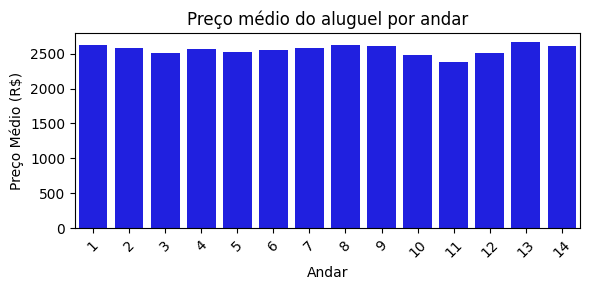

In [ ]:

media_por_andar = df.groupby('andar')['preco_aluguel'].mean().reset_index()

plt.figure(figsize=(6,3))
sns.barplot(data=media_por_andar, x='andar', y='preco_aluguel', color='blue')
plt.title('Preço médio do aluguel por andar')
plt.ylabel('Preço Médio (R$)')
plt.xlabel('Andar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Valor minimo, maximo e medio do aluguel por numero de banheiros

df.groupby("banheiros").agg(
    menor_preco=("preco_aluguel", "min"),
    maior_preco=("preco_aluguel", "max"),
    media_precos=("preco_aluguel", "mean")
)

,menor_preco,maior_preco,media_precos
banheiros,,,
1,1256,4143,2517.380000
2,1458,3993,2612.227405
3,1306,3597,2643.175439


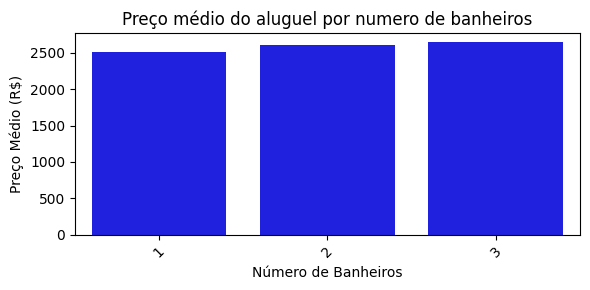

In [ ]:

media_por_andar = df.groupby('banheiros')['preco_aluguel'].mean().reset_index()

plt.figure(figsize=(6,3))
sns.barplot(data=media_por_andar, x='banheiros', y='preco_aluguel', color='blue')
plt.title('Preço médio do aluguel por numero de banheiros')
plt.ylabel('Preço Médio (R$)')
plt.xlabel('Número de Banheiros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Valor max,min e medio do aluguel de acordo com a garagem
df.groupby("garagem").agg(
    menor_preco=("preco_aluguel", "min"),
    maior_preco=("preco_aluguel", "max"),
    media_precos=("preco_aluguel", "mean")
)


,menor_preco,maior_preco,media_precos
garagem,,,
0,1256,3869,2432.050971
1,1366,4143,2644.690476


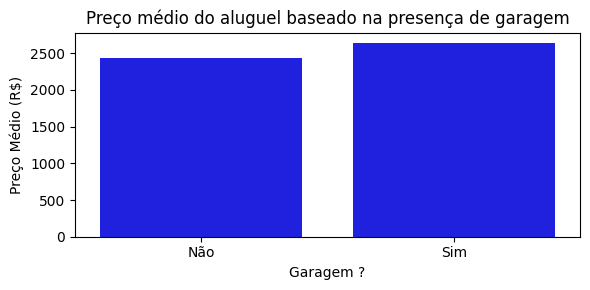

In [ ]:
media_garagem = df.groupby('garagem')['preco_aluguel'].mean().reset_index()
media_garagem['garagem'] = media_garagem['garagem'].map({0: 'Não', 1: 'Sim'})

plt.figure(figsize=(6,3))
sns.barplot(data=media_garagem, x='garagem', y='preco_aluguel', color='blue')
plt.title('Preço médio do aluguel baseado na presença de garagem')
plt.ylabel('Preço Médio (R$)')
plt.xlabel('Garagem ?')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


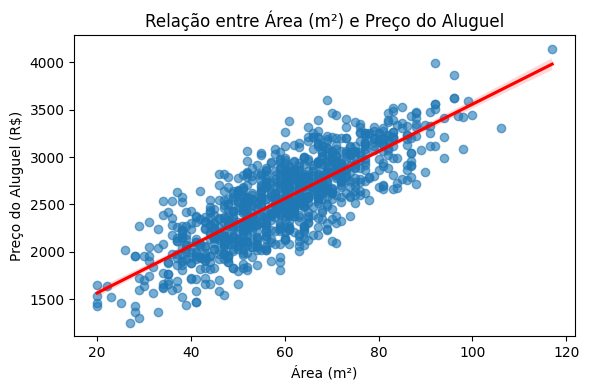

In [ ]:
# Relação entre area_m2 e preço do aluguel

plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='area_m2', y='preco_aluguel',
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relação entre Área (m²) e Preço do Aluguel')
plt.xlabel('Área (m²)')
plt.ylabel('Preço do Aluguel (R$)')
plt.tight_layout()
plt.show()


Quanto maior a area do apartamento, maior o preço do aluguel

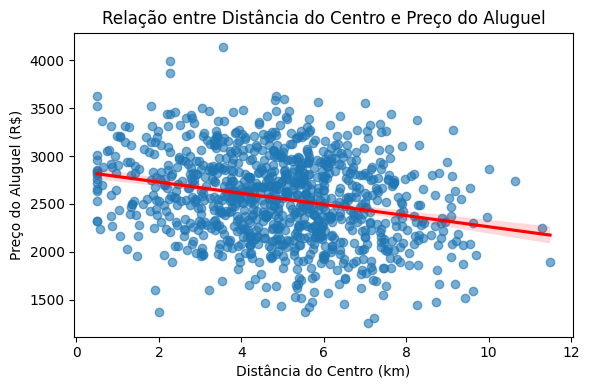

In [ ]:
# Gráfico Sobre Relação entre Distância do Centro e Preço do Aluguel
plt.figure(figsize=(6, 4))
sns.regplot(data=df, x='distancia_centro_km', y='preco_aluguel',
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Relação entre Distância do Centro e Preço do Aluguel')
plt.xlabel('Distância do Centro (km)')
plt.ylabel('Preço do Aluguel (R$)')
plt.tight_layout()
plt.show()


Quanto mais distante do centro, menor o preço do aluguel

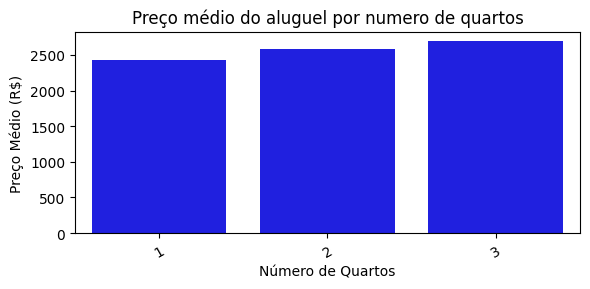

In [ ]:
# Relação entre o numero de quartos e preço do aluguel
media_por_andar = df.groupby('quartos')['preco_aluguel'].mean().reset_index()

plt.figure(figsize=(6,3))
sns.barplot(data=media_por_andar, x='quartos', y='preco_aluguel', color='blue')
plt.title('Preço médio do aluguel por numero de quartos')
plt.ylabel('Preço Médio (R$)')
plt.xlabel('Número de Quartos')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [ ]:
# Valor minimo, maximo e medio do aluguel por numero de quartos

df.groupby("quartos").agg(
    menor_preco=("preco_aluguel", "min"),
    maior_preco=("preco_aluguel", "max"),
    media_precos=("preco_aluguel", "mean")
).reset_index()



,quartos,menor_preco,maior_preco,media_precos
0,1,1256,3469,2429.347973
1,2,1425,4143,2580.107143
2,3,1531,3993,2688.110000


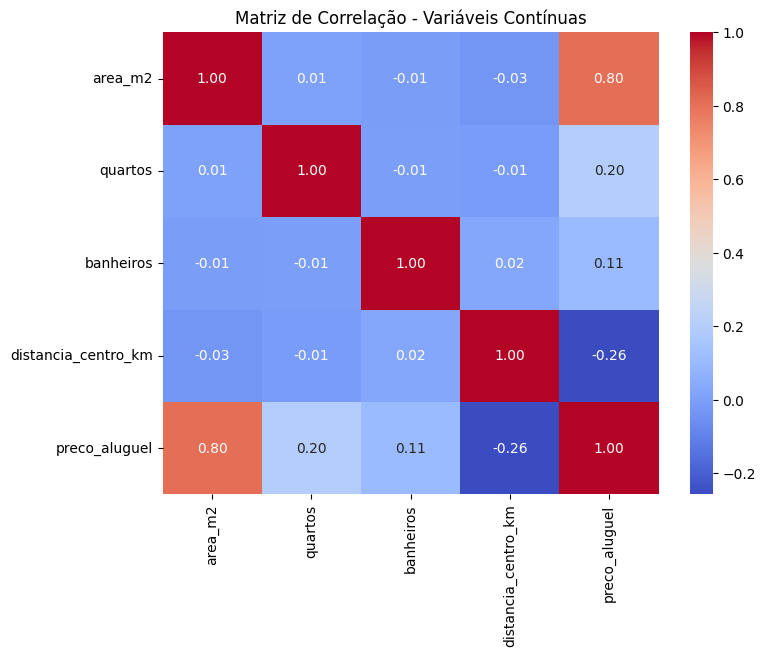

In [ ]:
# Matriz de correlação

df_continuas = df[["area_m2","quartos","banheiros","distancia_centro_km","preco_aluguel"]]
plt.figure(figsize=(8, 6))
sns.heatmap(df_continuas.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Variáveis Contínuas')
plt.show()


**Percebe-se que as variáveis que mais influenciam no preço do aluguel são a área do apartamento e a distância do centro. Porém, distacia_centro_km tem correlação negativa, enquanto area_m2, positiva. O que significa que:**

**Quanto maior a area do apartamento, maior o preço do aluguel**

**Quanto mais distante do centro, menor o preço do aluguel**

## Regressão Linear

In [ ]:
# Separando as features da variavel target

X = df[['area_m2', 'quartos', 'banheiros', 'garagem', 'distancia_centro_km']]
y = df['preco_aluguel']


In [ ]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Treinando o modelo de regressao linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Previsoes no conjunto de teste
y_pred = modelo.predict(X_test)


In [ ]:
# Avaliar performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 158.61
R² Score: 0.82


In [ ]:
# Analisando coeficientes
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo.coef_
})

print(coeficientes)


              Variável  Coeficiente
0              area_m2    24.032926
1              quartos   123.945450
2            banheiros   101.107360
3              garagem   196.855690
4  distancia_centro_km   -51.096521


###  Análise dos Resultados

**Erro Médio (MAE): R\$158,61**
O modelo erra, em média, R\$158,61 no valor do aluguel. Esse valor é aceitável pois os preços dos alugueis sao mais caros

**R² Score: 0.82**
O modelo explica 82% da variação no aluguel, o que indica uma boa performance para uma regressão linear simples.

###  Coeficientes do Modelo

* `area_m2`: +R\$24,03 por m²
* `quartos`: +R\$123,95 por quarto
* `banheiros`: +R\$101,11 por banheiro
* `garagem`: +R\$196,86 se tiver garagem
* `distancia_centro_km`: –R\$51,10 por km longe do centro

Esses coeficientes fazem sentido: conforto e localização aumentam o preço, enquanto distância reduz.

###  Conclusão

O modelo tem **boa capacidade explicativa** e um **erro médio razoável**. Pode ser aprimorado com técnicas como engenharia de atributos, remoção de outliers ou uso de modelos mais sofisticados.


## Classificação

In [ ]:

# 1. Criar a coluna "caro"
df["caro"] = df["preco_aluguel"] > df["preco_aluguel"].mean()

In [ ]:
# 2. Selecionar as variáveis preditoras
X = df[["area_m2", "quartos", "banheiros", "garagem", "distancia_centro_km"]]
y = df["caro"]


In [ ]:
# 3. Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 4. Treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)


LogisticRegression()

In [ ]:

# 5. Fazer previsões
y_pred = modelo.predict(X_test)


In [ ]:

# 6. Avaliar o desempenho
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)



In [ ]:
# 7. Mostrar os resultados
print(f"Acurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"Recall: {rec:.2f}")



Acurácia: 0.84
Precisão: 0.87
Recall: 0.83


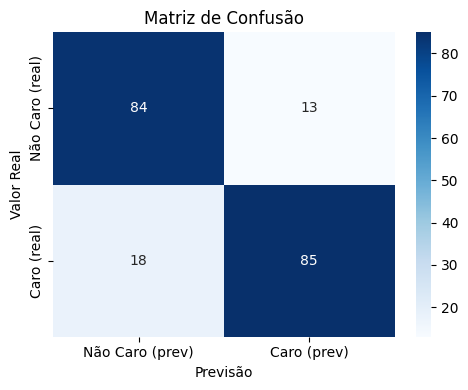

In [ ]:
# Criar o gráfico da matriz de confusão
plt.figure(figsize=(5,4))
sns.heatmap([[84, 13], [18, 85]], annot=True, fmt='d', cmap='Blues',
            xticklabels=["Não Caro (prev)", "Caro (prev)"],
            yticklabels=["Não Caro (real)", "Caro (real)"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()

**Interpretação dos Resultados**

Apesar de apresentar uma **acurácia de 84%**, **precisão de 87%** e **recall de 83%**, o modelo **não atende ao nível de desempenho desejado pelo aluno (eu queria entre 96% e 98%)**. Isso indica que, embora o modelo acerte a maioria dos casos, ele ainda comete erros significativos, especialmente ao classificar imóveis caros como baratos (18 falsos negativos). Para melhorar esses resultados, é possível explorar **engenharia de atributos**, **remoção de outliers**, e **uso de algoritmos mais robustos** como **Random Forest, Gradient Boosting ou SVM**, além de **ajuste de hiperparâmetros** e **balanceamento de classes** (se necessário). Essas estratégias podem ajudar a capturar melhor padrões complexos nos dados e aumentar a performance geral do modelo.
